# Data load and cleaning

In [1]:
import pandas as pd

#load the data data_by_year.csv
data_by_year = pd.read_csv('/Users/taief/Desktop/MUSIC REC/data/data_by_year.csv')
#print data head
print(data_by_year.head())

   mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  

In [3]:
# Check for missing values
print(data_by_year.isnull().sum())

# Get a summary of the dataset
print(data_by_year.describe())

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64
        mode         year  acousticness  danceability    duration_ms  \
count  100.0   100.000000    100.000000    100.000000     100.000000   
mean     1.0  1970.500000      0.556317      0.536783  227296.752234   
std      0.0    29.011492      0.275358      0.052356   25630.048065   
min      1.0  1921.000000      0.219931      0.414445  156881.657475   
25%      1.0  1945.750000      0.289516      0.500800  210889.193536   
50%      1.0  1970.500000      0.459190      0.540976  235520.850833   
75%      1.0  1995.250000      0.856711      0.570948  247702.738058   
max      1.0  2020.000000      0.962607      0.692904  267677.823086   

           energy  instrumenta

In [4]:
#data standardization
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Feature to scale
features_to_scale = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# Apply the scaler to the features to scale
data_by_year[features_to_scale] = scaler.fit_transform(data_by_year[features_to_scale])

# Display the first five rows of the DataFrame
print(data_by_year.head())


   mode  year  acousticness  danceability  duration_ms    energy  \
0     1  1921      1.206593     -2.268729     1.303465 -1.372612   
1     1  1922      1.395278     -1.050819    -2.424439 -1.335327   
2     1  1923      1.463369      0.778558    -1.935347 -1.182517   
3     1  1924      1.401148      0.251686    -1.421483 -0.673342   
4     1  1925      1.482933      0.711808    -1.659106 -1.081931   

   instrumentalness  liveness  loudness  speechiness     tempo   valence  \
0          1.241416 -0.141117 -1.643865    -0.394037 -2.567559 -2.656372   
1          1.974278  1.824215 -2.364442     0.132090 -2.682246  0.059618   
2          1.461764  1.079979 -0.699070    -0.145779 -0.355409  1.623313   
3          3.184595  1.515427 -0.732122    -0.168531  0.828525  2.288008   
4          1.843836  1.652901 -0.704637     0.074121 -0.087526  1.561357   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5  


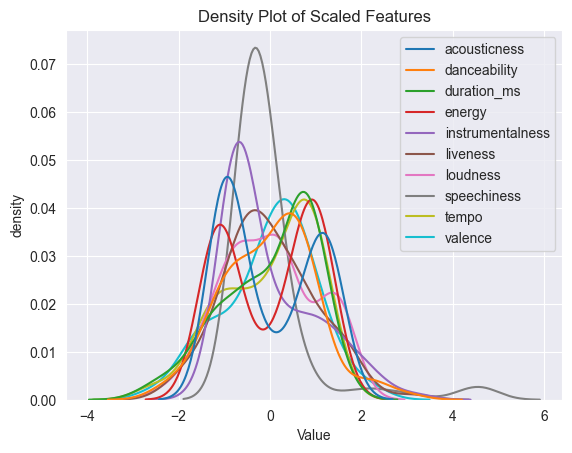

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the scaled features
sns.kdeplot(data=data_by_year[features_to_scale])
plt.title('Density Plot of Scaled Features')
plt.xlabel('Value')
plt.ylabel('density')
# save the plot
plt.savefig('/Users/taief/Desktop/MUSIC REC/data/scaled_features_year.png')
plt.show()
